In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
data = pd.read_csv("train.csv")
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


# EDA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
data['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [ ]:
data['Cabin'] = data['Cabin'].fillna(data['Cabin'].mode()[0])
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [ ]:
# conteo de valores nulos
data.isnull().sum().sum()

0

In [ ]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S


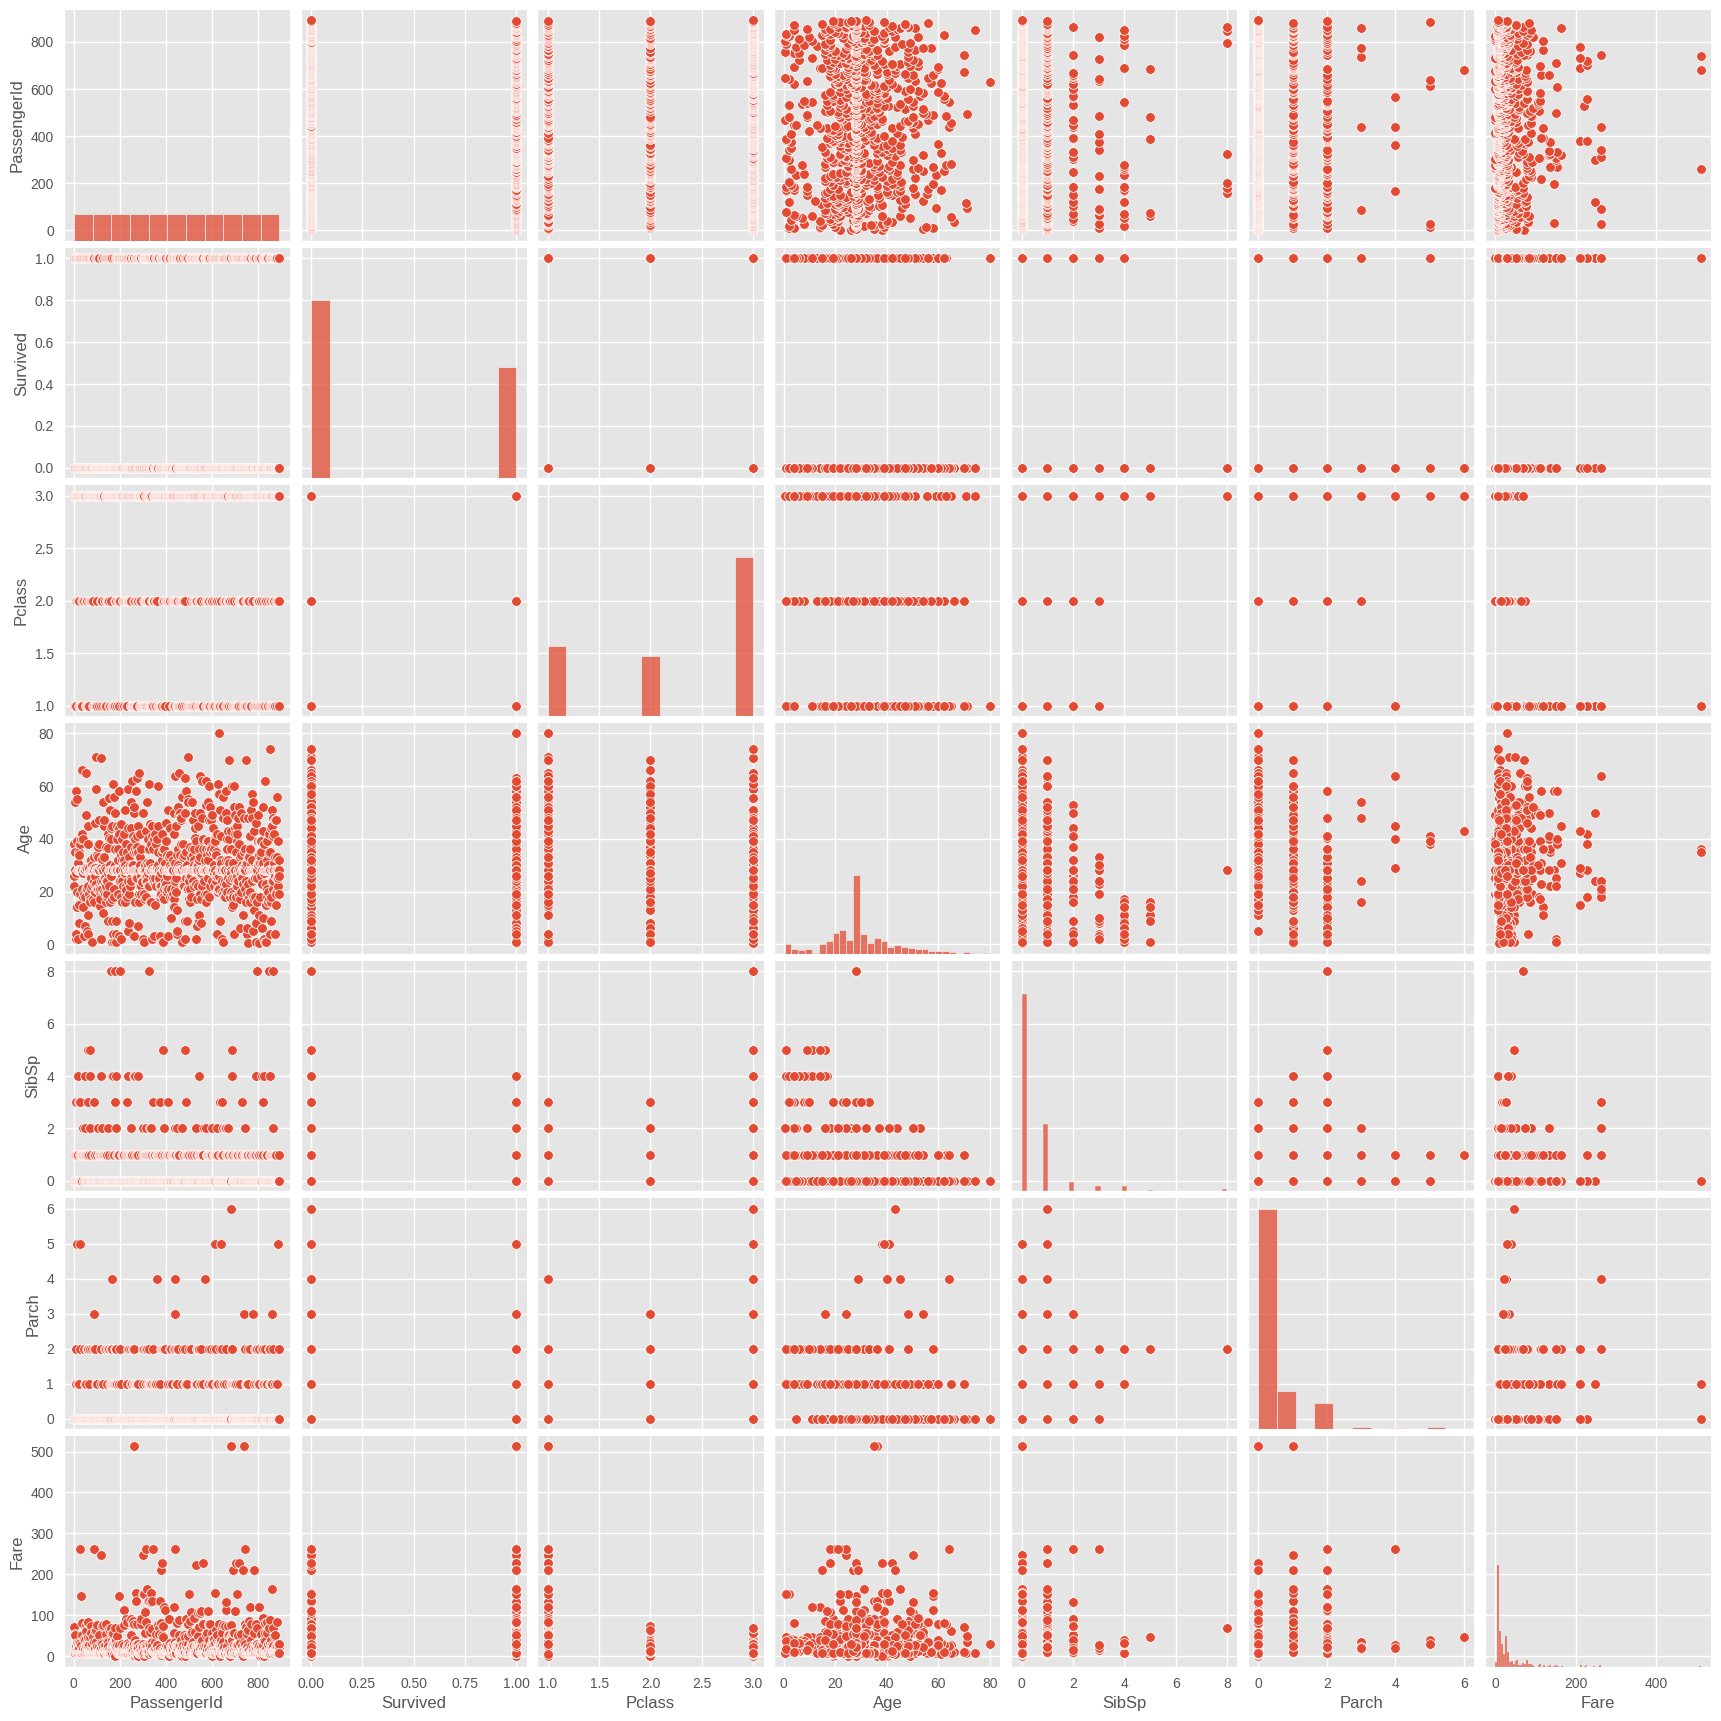

In [ ]:
sns.pairplot(data)

In [ ]:
data_num = data.select_dtypes(include=['int', 'float'])

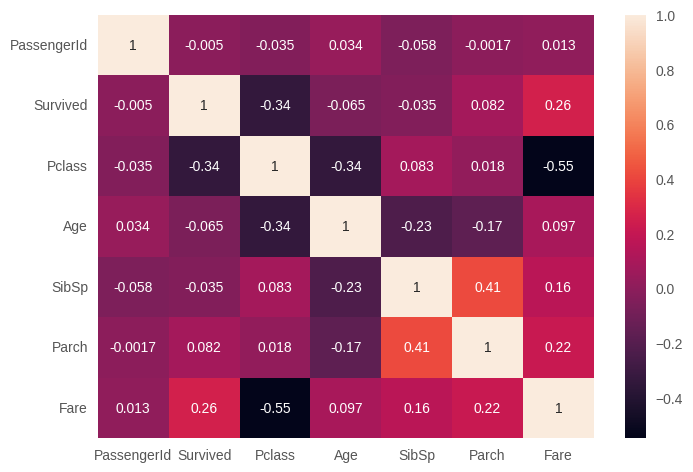

In [ ]:
sns.heatmap(data_num.corr(), annot=True)
plt.show()

In [ ]:
group_sex = data.groupby(['Sex', 'Survived']).count()['PassengerId']
print(group_sex)

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: PassengerId, dtype: int64


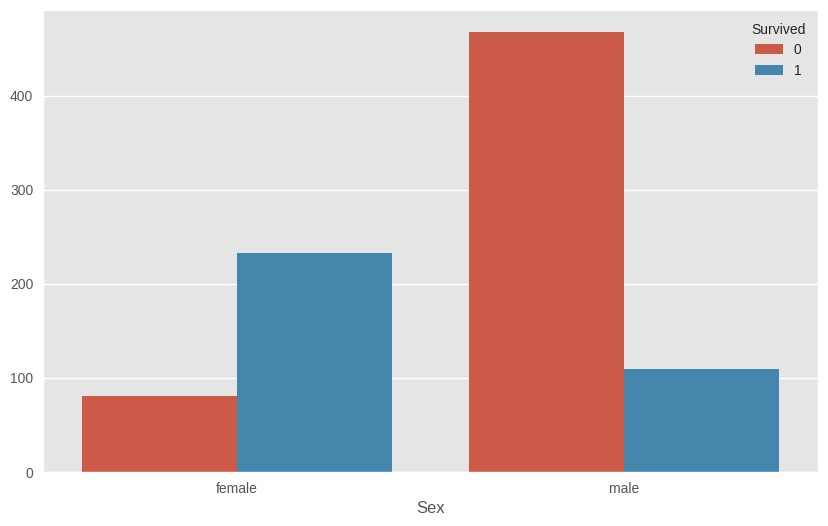

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=group_sex.index.get_level_values(0), y=group_sex.values, hue=group_sex.index.get_level_values(1))
plt.show()

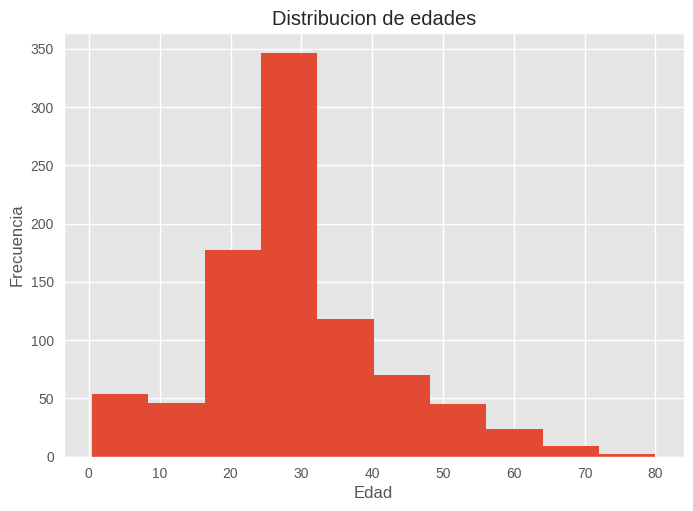

In [ ]:
data['Age'].hist()
plt.title('Distribucion de edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.style.use('ggplot')
plt.show()

# Procesamiento

In [ ]:
# crear una variable para saber los pasajeros que viajaban solo
data['Solo'] = data['SibSp'] + data['Parch']
data['Solo'] = data['Solo'].apply(lambda x: 1 if x == 0 else 0)

In [ ]:
df = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'Parch'], axis=1)
df = pd.get_dummies(df)

bool_columns = df.select_dtypes(include=['bool']).columns
for col in bool_columns:
    df[col] = df[col].astype(int)
df = pd.get_dummies(df, drop_first=True)

In [ ]:
df.head(2)

,Survived,Pclass,Age,SibSp,Fare,Solo,Sex_female,Sex_male
0,0,3,22.0,1,7.2500,0,0,1
1,1,1,38.0,1,71.2833,0,1,0


#  ML


In [ ]:
y = df['Survived']
columns = ['Age','Pclass','SibSp','Fare','Solo','Sex_female','Sex_male']
X = df[columns]

In [ ]:
print('dimesion de x',X.shape,'\n'
'deimesion de y',y.shape)

dimesion de x (891, 7) 
deimesion de y (891,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ramdon forest

In [ ]:
forest_model = RandomForestClassifier(random_state=1)
forest_model.fit(X_train, y_train)
y_pred_foret = forest_model.predict(X_test)
print(classification_report(y_test, y_pred_foret))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



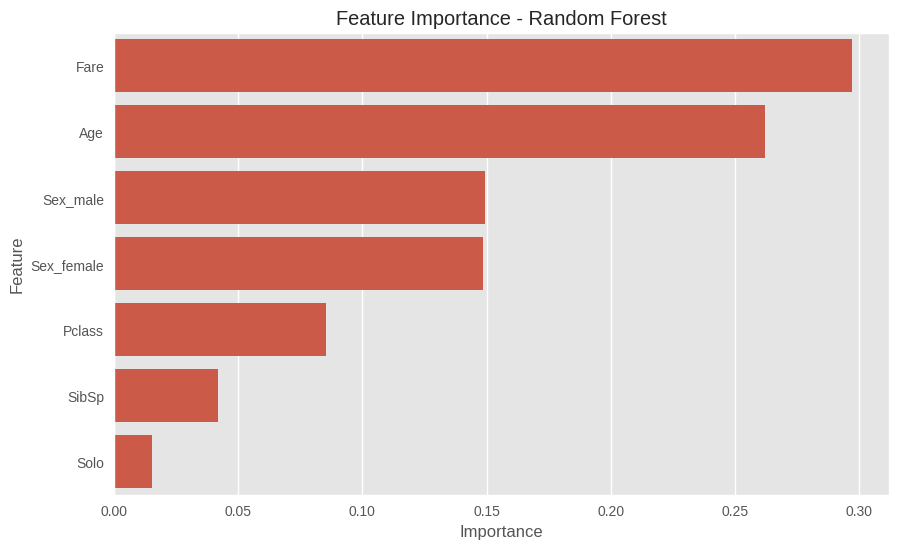

In [ ]:

# Importancia de las características
importances = forest_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Suponiendo que las características se llaman igual que las columnas de X_train
feature_names = X_train.columns

# Crear un DataFrame para las importancias
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Ordenar el DataFrame por importancia
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Graficar
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance - Random Forest')
plt.show()


# Modelo SVM

In [ ]:
model_svm = SVC(probability=True)
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.64      0.94      0.76       105
           1       0.75      0.24      0.37        74

    accuracy                           0.65       179
   macro avg       0.69      0.59      0.56       179
weighted avg       0.68      0.65      0.60       179



# Regresion Logistica

In [ ]:
model_logistica = LogisticRegression()
model_logistica.fit(X_train, y_train)
y_pred_logistica = model_logistica.predict(X_test)
print(classification_report(y_test, y_pred_logistica))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Evaluacion

In [ ]:
cm_foret = confusion_matrix(y_test, y_pred_foret)
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_logistica = confusion_matrix(y_test, y_pred_logistica)

In [ ]:
cm_foret

array([[90, 15],
       [19, 55]])

In [ ]:
cm_svm

array([[99,  6],
       [56, 18]])

In [ ]:
cm_logistica

array([[89, 16],
       [19, 55]])

# Predicion

In [ ]:
Test = pd.read_csv('test.csv')

In [ ]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         418 non-null    float64
 1   Pclass      418 non-null    int64  
 2   SibSp       418 non-null    int64  
 3   Fare        418 non-null    float64
 4   Solo        418 non-null    int64  
 5   Sex_female  418 non-null    int64  
 6   Sex_male    418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


In [ ]:
Test['Solo'] = Test['SibSp'] + Test['Parch']
Test['Solo'] = Test['Solo'].apply(lambda x: 1 if x == 0 else 0)

In [ ]:
Test['Age'] = Test['Age'].fillna(Test['Age'].median())
Test['Fare'] = Test['Fare'].fillna(Test['Fare'].median())

<ipython-input-370-c7dace5b5cff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test['Age'] = Test['Age'].fillna(Test['Age'].median())
<ipython-input-370-c7dace5b5cff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test['Fare'] = Test['Fare'].fillna(Test['Fare'].median())


In [ ]:
Test_dummies = Test_dummies.astype(int)
Test = pd.concat([Test, Test_dummies], axis=1)

In [ ]:
X_test1 = Test[columns]

In [ ]:
# Eliminar las columnas duplicadas
X_test1 = Test.loc[:, ~X_test1.columns.duplicated()]

In [ ]:
X_test1.isnull().sum()

,0
Age,0
Pclass,0
SibSp,0
Fare,0
Solo,0
Sex_female,0
Sex_male,0


In [ ]:
Y_pred_log = model_logistica.predict(X_test1)
Y_pred_fores = forest_model.predict(X_test1)
y_pred_svm = model_svm.predict(X_test1)
print(Y_pred_log[0:10])

[0 0 0 0 1 0 1 0 1 0]


In [ ]:
print(Y_pred_fores[0:10])

[0 0 0 1 0 0 0 0 1 0]


In [ ]:
print(y_pred_svm[0:10])

[0 0 0 0 0 0 0 0 0 0]


# Descargamos

In [ ]:
# Verificar si 'PassengerId' existe en Test. Si no, intenta inferirlo.
if 'PassengerId' not in Test.columns:

  Test['PassengerId'] = range(892, 892 + len(Test))

# Crear un DataFrame con los resultados de la predicción
submission_df = pd.DataFrame({
    'PassengerId': Test['PassengerId'],
    'Survived': y_pred_svm
})

# Guardar el DataFrame en un archivo CSV
submission_df.to_csv('submission.csv', index=False)

# Descargar el archivo CSV
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Resultados

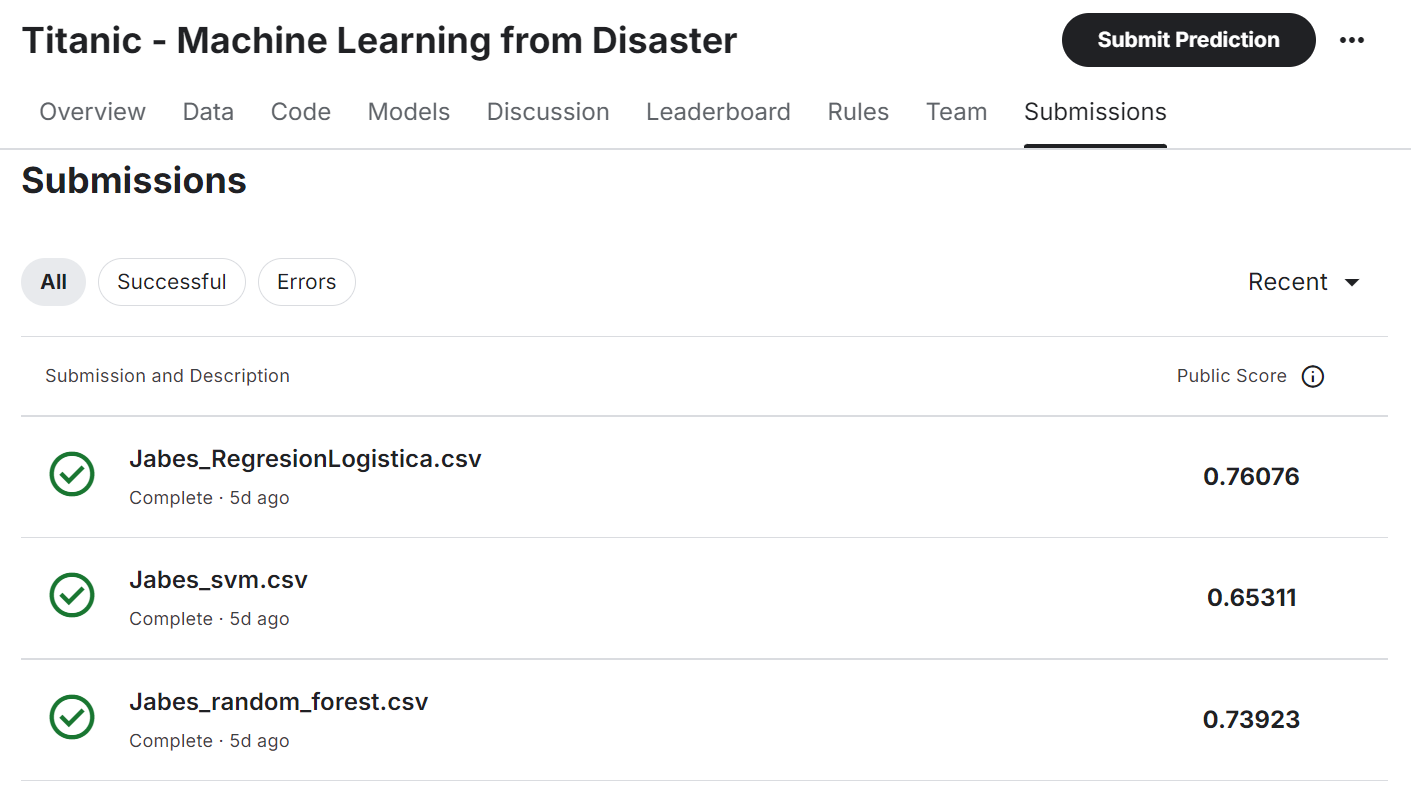